


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Multi-Layer Perceptron using PyTorch

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W7_DEMO_EXP3" #name of the notebook

def setup():
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
import torch
import torch.nn as nn

#torchvision package consisting of popular datasets, model architectures, and common image transformations for computer vision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

#Inbuilt weight initialization functions
import torch.nn.init as weight_init

#For plotting 
import matplotlib.pyplot as plt

In [0]:
torch.__version__

'0.4.1'

**Initializing CUDA**

In [0]:
### To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

device = torch.device("cuda" if use_cuda else "cpu")

Using PyTorch version: 0.4.1 CUDA: True


**Loading Dataset**

In [0]:
#Loading the train set file
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)
#Loading the test set file
test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [0]:
#Number of training samples
len(train_dataset)

60000

In [0]:
#Size of one training image. The first axis is te=he 
train_dataset[0][0].size()

torch.Size([1, 28, 28])

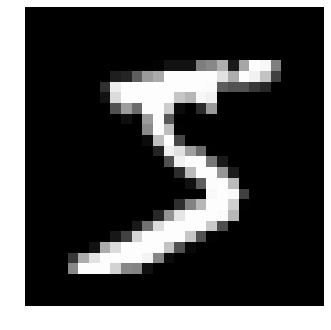

In [0]:
plt.figure()
plt.axis('off')
#Squeeze function used to remove the first dimension
plt.imshow(train_dataset[0][0].squeeze().numpy(),cmap='gray')

**Dataloader**

In [0]:
batch_size = 10
#loading the train dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

# loading the test dataset

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [0]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([10, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([10]) type: torch.LongTensor


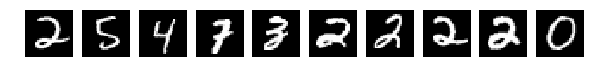

In [0]:
#Plotting 10 digits
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray")

**Defining Neural Network**

Let's define the network as a Python class. This Python class inherits functions from _nn.module_.

There are three convenient functions that are defined in this class:

- ### **\__init__()**:
In this function, we shall declare all the layers of our neural network, including the number of neurons, non-linear activations, etc.

- ### **forward()**:
This is the function that is used to compute forward pass of the network. Here, we shall connect the different layers we had defined in \__init__, according to the network architecture we want to make. In this case, $x -> fc1 -> relu -> fc2 -> out$.

"forward" can be called by calling the object of this class directly. For example:

```
net = Network()
out = net(x)
```

- ### **backward()**:
This function is used to compute gradients across the entire network, and is called from the loss function at the end of the network.

```
loss.backward()
```

We have to write the **__init__()** and **forward()** methods, and PyTorch will automatically generate a **backward()** method for computing the gradients for the backward pass.

In [0]:
# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 3
batch_size = 64
learning_rate = 0.001

In [0]:
#Creating the network class (inheriting nn Module) and implementing __init__() and forward() functions
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
        
        #Weight Initialization
        for m in self.modules():
          if isinstance(m,nn.Linear):
            weight_init.xavier_normal_(m.weight)
            
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

#### Creating a neural network object


In [0]:
net = Net(input_size, hidden_size, num_classes)

#### 3. Loss and Optimizer
We shall use the Cross Entropy Loss function as the loss.

In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
# SGD for Optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)  

**Transfer to GPU**

In [0]:
net = net.to(device)
net

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax()
)

**Training**

In [0]:
# In each epoch
for epoch in range(num_epochs):
    
    # For each batch of images in train set
    for i, (images, labels) in enumerate(train_loader):
        
        
        images = images.view(-1, 28*28)
        labels = labels
        
        images, labels = images.to(device), labels.to(device)
        
        # Initialize gradients to 0
        optimizer.zero_grad()
        
        # Forward pass (this calls the "forward" function within Net)
        outputs = net(images)
        
        # Find the loss
        loss = criterion(outputs, labels)
        
        # Find the gradients of all weights using the loss
        loss.backward()
        
        # Update the weights using the optimizer
        # For e.g.: w = w - (delta_w)*lr
        optimizer.step()
        
        if (i+1) % 1000 == 0:
            print ('Epoch [%d/%d], Step [%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, loss.item()))

Epoch [1/3], Step [1000], Loss: 2.3006
Epoch [1/3], Step [2000], Loss: 2.2553
Epoch [1/3], Step [3000], Loss: 2.2397
Epoch [1/3], Step [4000], Loss: 2.1872
Epoch [1/3], Step [5000], Loss: 2.1232
Epoch [1/3], Step [6000], Loss: 2.2531
Epoch [2/3], Step [1000], Loss: 2.1323
Epoch [2/3], Step [2000], Loss: 2.0545
Epoch [2/3], Step [3000], Loss: 1.9317
Epoch [2/3], Step [4000], Loss: 2.0768
Epoch [2/3], Step [5000], Loss: 2.0206
Epoch [2/3], Step [6000], Loss: 1.8907
Epoch [3/3], Step [1000], Loss: 1.9186
Epoch [3/3], Step [2000], Loss: 1.9573
Epoch [3/3], Step [3000], Loss: 2.1270
Epoch [3/3], Step [4000], Loss: 1.9010
Epoch [3/3], Step [5000], Loss: 1.7997
Epoch [3/3], Step [6000], Loss: 1.9292


In [0]:
correct = 0
total = 0

# For each batch of images in test set
with torch.set_grad_enabled(False):
    for images, labels in test_loader:

      # Get the images
      images = images.view(-1, 28*28)

      images = images.to(device)

      # Find the output by doing a forward pass through the network
      outputs = net(images)

      # Find the class of each sample by taking a max across the probabilities of each class
      _, predicted = torch.max(outputs.data, 1)

      # Increment 'total', and 'correct' according to whether the prediction was correct or not
      total += labels.size(0)
      correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %


**Save and Load Model**

In [0]:
torch.save(net.state_dict(),'mlp_model.ckpt')

In [0]:
net = Net(input_size, hidden_size, num_classes)
checkpoint = torch.load('mlp_model.ckpt')
net.load_state_dict(checkpoint)
net = net.to(device)

In [0]:
correct = 0
total = 0

# For each batch of images in test set
with torch.set_grad_enabled(False):
    for images, labels in test_loader:

      # Get the images
      images = images.view(-1, 28*28)

      images = images.to(device)

      # Find the output by doing a forward pass through the network
      outputs = net(images)

      # Find the class of each sample by taking a max across the probabilities of each class
      _, predicted = torch.max(outputs.data, 1)

      # Increment 'total', and 'correct' according to whether the prediction was correct or not
      total += labels.size(0)
      correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %


### Please answer the questions below to complete the experiment:




In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Additional Question
